# Dataset de severidade

In [1]:
from datetime import datetime

current_datetime_gen = datetime.now().strftime("%Y-%m-%d %H:%M")
current_datetime_gen

'2024-08-27 09:12'

In [2]:
import pandas as pd

severity_df = pd.read_csv("Data/severity.csv")
severity_df[(severity_df["date"] < "2008-02-19") & (severity_df["severity_acc"] > 0)]

,Unnamed: 0,occurrence_id,planting_relative_day,date,severity_acc
902980,902980,9412,0,2008-01-01,4.8666
902981,902981,9412,1,2008-01-02,17.6718
902982,902982,9412,2,2008-01-03,21.8294
902983,902983,9412,3,2008-01-04,25.2626
902984,902984,9412,4,2008-01-05,30.9144
...,...,...,...,...,...
1529021,1529021,364,297,2005-07-17,710.5557
1529022,1529022,364,298,2005-07-18,710.5557
1529023,1529023,364,299,2005-07-19,710.5557
1529024,1529024,364,300,2005-07-20,710.5557


<Axes: title={'center': 'Severidade acumulada para ocorrência ID 9412 >2024-08-27 09:12<'}, xlabel='date'>

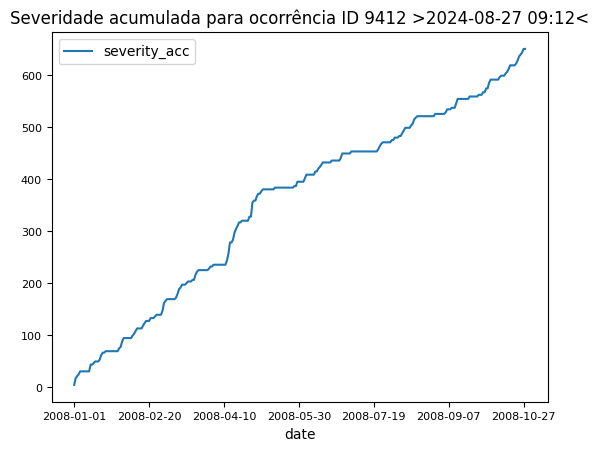

In [3]:
occurrence_id = 9412

severity_plot_df = severity_df[severity_df["occurrence_id"] == occurrence_id]

severity_plot_df.plot(
    y="severity_acc", x="date", 
    kind="line",
    fontsize=8,
    title=f"Severidade acumulada para ocorrência ID 9412 >{current_datetime_gen}<"
)

<Axes: title={'center': 'Severidade acumulada para ocorrência ID 9412 >2024-08-27 09:12<'}, xlabel='date'>

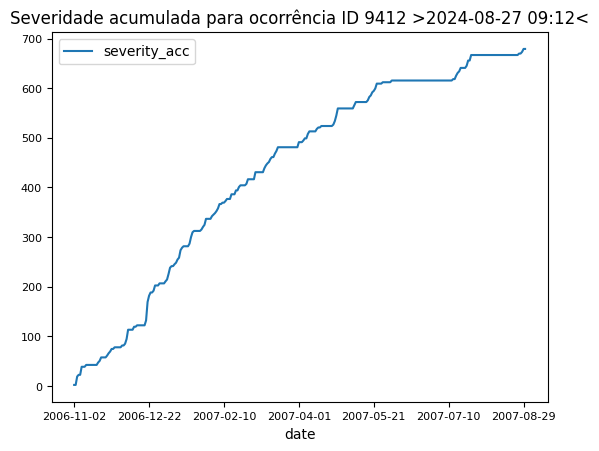

In [4]:
occurrence_id = 3255

severity_plot_df = severity_df[severity_df["occurrence_id"] == occurrence_id]

severity_plot_df.plot(
    y="severity_acc", x="date", 
    kind="line",
    fontsize=8,
    title=f"Severidade acumulada para ocorrência ID 9412 >{current_datetime_gen}<"
)

# Dataset de features para instâncias de Ferrugem Asiática da Soja

In [5]:
!pip install matplotlib

In [6]:
import pandas as pd


instances_df = pd.read_csv("Data/instances_all.csv", sep=",", parse_dates=["data_ocorrencia", "planting_start_date"])
instances_features_df = pd.read_csv("Data/features_all.csv", sep=",", parse_dates=["data_ocorrencia", "planting_start_date"])

## Formato do dataset

In [7]:
instances_features_df[["ocorrencia_id", "precipitation_acc_126d", "precipitation_count_126d", "precipitation_acc_133d", "precipitation_count_133d", "planting_relative_day"]].sample(10)

,ocorrencia_id,precipitation_acc_126d,precipitation_count_126d,precipitation_acc_133d,precipitation_count_133d,planting_relative_day
3520,6232,492.5625,53,493.8125,54,82
648,14748,1033.6875,97,1201.4375,111,56
3405,6525,460.7500,45,460.7500,45,82
2853,7707,538.1250,46,542.0000,47,82
2398,8576,499.8750,42,507.6250,43,82
98,18025,1391.8750,124,1400.1250,126,104
2764,7902,593.3125,53,596.5625,54,82
4520,2377,625.0625,45,683.8750,49,82
2441,8606,307.1250,41,336.3750,44,52
833,13589,561.9375,55,629.0625,62,104


## Instâncias por safra

==> Total: 5063 <==


<Axes: title={'center': 'Occurrences per year (count)'}, ylabel='safra'>

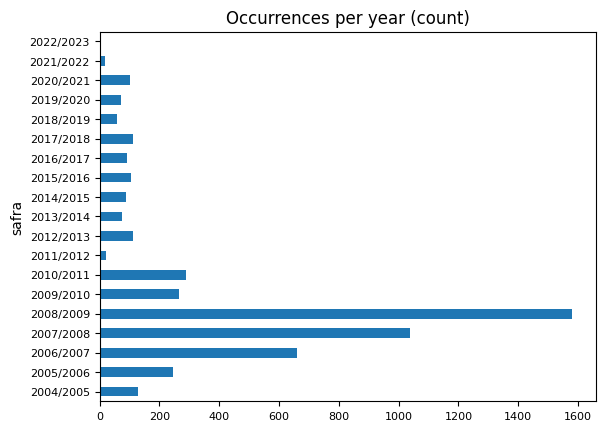

In [43]:
instances_per_year_df = instances_df[instances_df["data_ocorrencia"].notnull()]
instances_per_year_df = instances_per_year_df.groupby("safra")["safra"].count()

print(f"==> Total: {instances_df.shape[0]} <==")
# instances_per_year_df.plot(y="safra", kind="barh", fontsize=8, title=f"Consórcio: Instâncias de ocorrência por ano >{current_datetime_gen}<")
instances_per_year_df.plot(y="safra", kind="barh", fontsize=8, title=f"Occurrences per year (count)")

<Axes: title={'center': "Higher 'planting relative day' for occurrences, per harvest"}, xlabel='safra'>

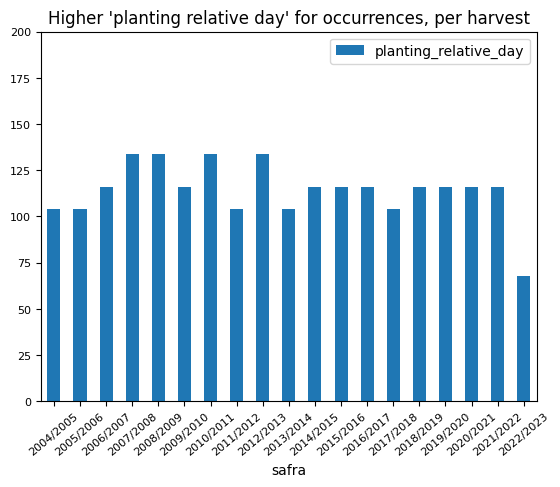

In [44]:
instances_per_year_df = instances_df.copy()
instances_per_year_df["planting_relative_day"] = instances_per_year_df["data_ocorrencia"] - instances_per_year_df["planting_start_date"]

relative_day_harvest = instances_per_year_df.groupby("safra", as_index=False)["planting_relative_day"].max()
relative_day_harvest['planting_relative_day'] = relative_day_harvest['planting_relative_day'].dt.days

# Colocar safra no eixo x
# print(relative_day_harvest['planting_relative_day'].max())
# print(relative_day_harvest)

# relative_day_harvest.plot(y="planting_relative_day", kind="bar", ylim=(0, 200), title=f"Maior 'dia relativo no plantio' de ocorrência das instâncias, por safra >{current_datetime_gen}<")
relative_day_harvest.plot(
    x="safra", y="planting_relative_day", 
    kind="bar", ylim=(0, 200), 
    rot=40, fontsize=8,
    title=f"Higher 'planting relative day' for occurrences, per harvest"
)

## Features

## Dia relativo na safra (ocorrência)

<Axes: title={'center': "Valor 'dia relativo no plantio' no dataset de features >2024-08-27 09:12<"}, xlabel='safra'>

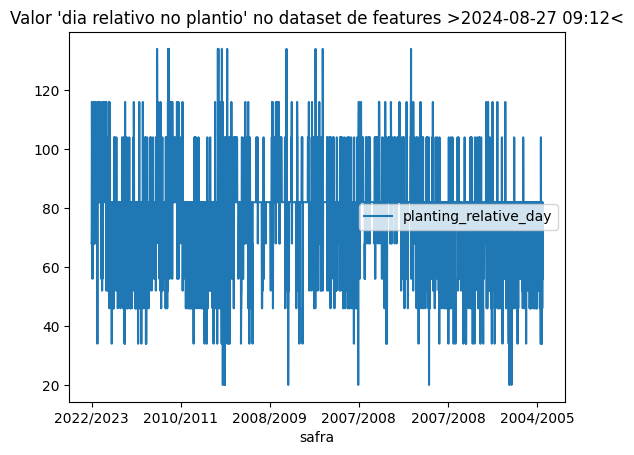

In [10]:
instances_features_df.plot(
    y="planting_relative_day", x="safra", 
    kind="line", 
    title=f"Valor 'dia relativo no plantio' no dataset de features >{current_datetime_gen}<"
)

<Axes: title={'center': "Distribution of 'planting relative day' of occurrences"}, xlabel='Value', ylabel='Frequency'>

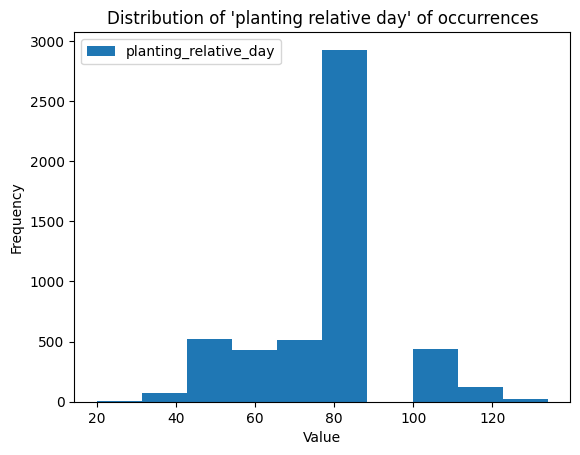

In [42]:
# instances_features_df.plot(y="planting_relative_day", kind="hist", title=f"Distribuição do 'dia relativo no plantio' >{current_datetime_gen}<")
instances_features_df.plot(
    y="planting_relative_day", 
    kind="hist", 
    xlabel="Value", title=f"Distribution of 'planting relative day' of occurrences"
)


In [12]:
df = pd.read_csv("Data/features_with_zero_all.csv", sep=",", parse_dates=["data_ocorrencia", "planting_start_date"])

c = 7
while c <= 140:  
    print(f"precipitation_acc_{c}d com ZERO, count:\t", df[f"precipitation_acc_{c}d"].value_counts()[0])
    c += 7

print("total: ", df.shape[0])


precipitation_acc_7d com ZERO, count:	 416
precipitation_acc_14d com ZERO, count:	 84
precipitation_acc_21d com ZERO, count:	 34
precipitation_acc_28d com ZERO, count:	 10
precipitation_acc_35d com ZERO, count:	 80
precipitation_acc_42d com ZERO, count:	 80
precipitation_acc_49d com ZERO, count:	 312
precipitation_acc_56d com ZERO, count:	 605
precipitation_acc_63d com ZERO, count:	 1034
precipitation_acc_70d com ZERO, count:	 1549
precipitation_acc_77d com ZERO, count:	 1549
precipitation_acc_84d com ZERO, count:	 4476
precipitation_acc_91d com ZERO, count:	 4476
precipitation_acc_98d com ZERO, count:	 4476
precipitation_acc_105d com ZERO, count:	 4915
precipitation_acc_112d com ZERO, count:	 4915
precipitation_acc_119d com ZERO, count:	 5040
precipitation_acc_126d com ZERO, count:	 5040
precipitation_acc_133d com ZERO, count:	 5040
precipitation_acc_140d com ZERO, count:	 5063
total:  5063
